In [1]:
import itchat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import pyecharts
from pyecharts import Map, Geo

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/Users/lxy/anaconda/lib/python3.6/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [2]:
itchat.auto_login(hotReload = False)
friends = itchat.get_friends(update = True)
friends = pd.DataFrame(friends)
friends=friends.dropna(axis=1,how='any')
friends.head()

Getting uuid of QR code.
INFO:itchat:Getting uuid of QR code.
INFO:itchat:Downloading QR code.
Please scan the QR code to log in.
INFO:itchat:Please scan the QR code to log in.
Please press confirm on your phone.
INFO:itchat:Please press confirm on your phone.
Loading the contact, this may take a little while.
INFO:itchat:Loading the contact, this may take a little while.
Login successfully as 红豆沙小圆子🔐
INFO:itchat:Login successfully as 红豆沙小圆子🔐


,Alias,AppAccountFlag,AttrStatus,ChatRoomId,City,ContactFlag,DisplayName,EncryChatRoomId,HeadImgUrl,HideInputBarFlag,...,RemarkPYQuanPin,Sex,Signature,SnsFlag,StarFriend,Statues,Uin,UniFriend,UserName,VerifyFlag
0,,0,0,0,,0,,,/cgi-bin/mmwebwx-bin/webwxgeticon?seq=82369904...,0,...,,2,"Let your heart hold fast <span class=""emoji em...",177,0,0,925619122,0,@60582da54e58eff6ca6be3a707eb605fa36c41f152dc0...,0
1,,0,234021,0,Sydney,2051,,,/cgi-bin/mmwebwx-bin/webwxgeticon?seq=68716714...,0,...,,2,UPlus微传媒为您提供最全面、贴心的信息服务，真伪请自辩！,1,0,0,0,0,@96dd315168e4f64886916b19c2446eeb185d931ce0eb4...,0
2,,0,135613,0,珠海,3,,,/cgi-bin/mmwebwx-bin/webwxgeticon?seq=68750330...,0,...,,1,,1,0,0,0,0,@34ead217085df7f8eb71d0a00f89894cecfa14e30263a...,0
3,,0,33656935,0,Melbourne,3,,,/cgi-bin/mmwebwx-bin/webwxgeticon?seq=68747697...,0,...,,1,"我家瓜最甜了<span class=""emoji emoji1f349""></span>低调低调",1,0,0,0,0,@947cf6a613834a9e208ca9510864bde3c06f766e5cc8f...,0
4,,0,229991,0,昆明,3,,,/cgi-bin/mmwebwx-bin/webwxgeticon?seq=68748967...,0,...,likailan,1,还想不出 面对七情六欲时的对策。,49,0,0,0,0,@461a4663a5638127f01e04fb55216e25,0


In [3]:
friends.shape

(685, 30)

In [4]:
text=friends['Signature'].to_string()
text

import re
from PIL import *
import PIL.Image
import chardet
import jieba
import numpy as np
r1 = '[a-zA-Z0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'
text=re.sub(r1, '', text)
text=' '.join(jieba.cut(text,cut_all=False))
background_Image = np.array(Image.open('333.png'))
img_colors = ImageColorGenerator(background_Image)
stopwords=STOPWORDS

wc = WordCloud(
        collocations=False,
        font_path='STHeiti Medium.ttc',
        margin = 1, # 页面边缘
        mask = background_Image,
        scale = 2,
        max_words = 200, # 最多词个数
        min_font_size = 4, #
        stopwords = stopwords,
        random_state = 42,
        background_color = 'white', # 背景颜色
#         background_color = '#C3481A', # 背景颜色
        max_font_size = 100,
        )
wc.generate(text)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/4m/rx5ksh5d4m14pvqv_fmf_5c40000gn/T/jieba.cache
DEBUG:jieba:Loading model from cache /var/folders/4m/rx5ksh5d4m14pvqv_fmf_5c40000gn/T/jieba.cache
Loading model cost 0.791 seconds.
DEBUG:jieba:Loading model cost 0.791 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


In [5]:
process_word = WordCloud.process_text(wc,text)
sort = sorted(process_word.items(),key=lambda e:e[1],reverse=True)
print(sort[:200])

[('一个', 13), ('没有', 11), ('人生', 9), ('生活', 9), ('自己', 9), ('努力', 8), ('我们', 7), ('世界', 7), ('朋友圈', 7), ('澳洲', 6), ('悉尼', 6), ('一生', 6), ('遇见', 6), ('快乐', 6), ('屏蔽', 6), ('移民', 6), ('休息', 5), ('花镇', 5), ('一起', 5), ('幸福', 5), ('喜欢', 5), ('可以', 5), ('留学', 5), ('不是', 5), ('就是', 5), ('回复', 5), ('时间', 5), ('周一', 5), ('自由', 5), ('服务', 4), ('添加', 4), ('微信', 4), ('学会', 4), ('美好', 4), ('简单', 4), ('支持', 4), ('岁月', 4), ('时候', 4), ('更好', 4), ('外卖', 4), ('想要', 4), ('大家', 4), ('什么', 4), ('代理', 4), ('最好', 4), ('需要', 4), ('揭谛', 4), ('低调', 3), ('从不', 3), ('联合', 3), ('创始人', 3), ('客服', 3), ('注册', 3), ('真的', 3), ('事情', 3), ('预约', 3), ('留学生', 3), ('优秀', 3), ('心有', 3), ('此号', 3), ('一天', 3), ('专业', 3), ('助手', 3), ('不加', 3), ('不负', 3), ('指南针', 3), ('有趣', 3), ('余生', 3), ('习惯', 3), ('地址', 3), ('感谢', 3), ('一样', 3), ('工作', 3), ('一只', 3), ('周五', 3), ('毕业', 3), ('先有', 3), ('健康', 2), ('代购', 2), ('保健品', 2), ('每周', 2), ('鲜肉', 2), ('才能', 2), ('深度', 2), ('情感', 2), ('维系', 2), ('导师', 2), ('爱是', 2), ('一种', 2), ('学习', 2), ('

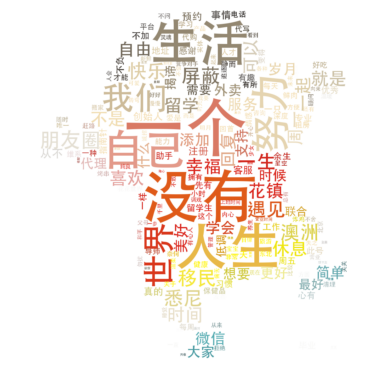

In [6]:
wc.recolor(color_func=img_colors)
# 存储图像
wc.to_file('微信词云.png')
# 显示图像
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
sns.set_style("whitegrid")

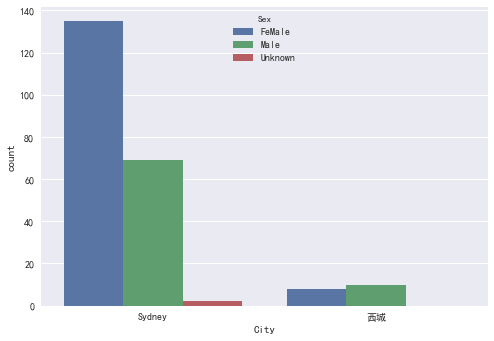

In [15]:

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
sns.set(font='SimHei') 
b=friends.query('City=="Sydney"or City =="西城"')
b.iloc[:,-9].replace(1,'Male',inplace=True)
b.iloc[:,-9].replace(2,'FeMale',inplace=True)
b.iloc[:,-9].replace(0,'Unknown',inplace=True)
graph = sns.countplot(x='City',hue='Sex',data=b)
plt.show()

In [16]:
friends.replace(["NaN", 'NaT'," ",""], np.nan, inplace = True)
df= friends.City.dropna()
ac=df.rename_axis('City')
df=ac.to_frame()
df=df.reset_index(drop=True)
df.columns = ['City']
# graph=sns.countplot(x='City',data=df)
# plt.show()


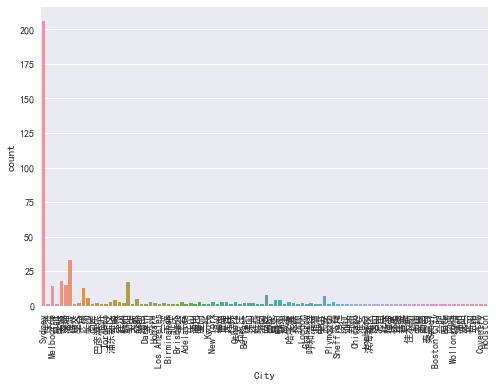

In [17]:
plt.rcParams['font.sans-serif']=['SimHei']
graph=sns.countplot(x='City',data=df)
plt.xticks(rotation=90) 
plt.show()

In [18]:
import re
bb=ac.value_counts().to_frame()
bb=bb.reset_index(drop=False)
bb.columns=['City','Count']
# bb.City
# a=bb.loc[bb.iloc[:,0].str.contains(re.compile('[a-zA-Z0-9]+'))]
# a=bb[~bb.City.isin(list(a.City))]

In [28]:
def check_contain_chinese(check_str):
    check_str = check_str[0]
    if check_str == '其他':
        return False
    for ch in check_str:
        ch = ord(ch.lower())
        if ch >= ord('a') and ch <= ord('z'):
            return False
    return True
counters = list(ac.value_counts().items())
counters = list(filter(check_contain_chinese, counters))


geo = Geo(
    title_color="#fff",
    title_pos="center",
    width=1200,
    height=600,
    background_color="#404a59",
)

attr, value = geo.cast(counters)
geo.add_coordinate("昌平", 39.9,116.29)
geo.add_coordinate("普陀", 29.97,122.32)
geo.add_coordinate("长宁", 31.22,121.42)
geo.add_coordinate("西城", 39.91,116.36)
geo.add_coordinate("南岸", 39.9,116.29)
geo.add_coordinate("东城", 39.9,116.29)
geo.add_coordinate("闵行", 39.9,116.29)
geo.add_coordinate("静安", 39.9,116.29)
geo.add_coordinate("武清", 39.9,116.29)
geo.add_coordinate("沙坪坝", 39.9,116.29)
geo.add_coordinate("嘉定", 39.9,116.29)
geo.add_coordinate("南开", 39.9,116.29)
geo.add_coordinate("杨浦", 39.9,116.29)
geo.add_coordinate("怀柔", 39.9,116.29)
geo.add_coordinate("渝中", 39.9,116.29)
geo.add_coordinate("房山", 39.9,116.29)
geo.add_coordinate("丰台", 39.9,116.29)
geo.add_coordinate("虹口", 39.9,116.29)
geo.add_coordinate("德宏", 39.9,116.29)
geo.add_coordinate("延庆", 39.9,116.29)
geo.add_coordinate("海淀", 39.9,116.29)
geo.add_coordinate("北辰", 39.9,116.29)
geo.add_coordinate("顺义", 39.9,116.29)
geo.add_coordinate("江北", 39.9,116.29)
geo.add_coordinate("平谷", 39.9,116.29)

geo.add("微信好友地域信息", attr, value, visual_range=[0, 13], type="effectScatter",visual_text_color="#fff",
            symbol_size=10, is_visualmap=True)
geo.render("222.html")

In [ ]:
Faker.provinces